<div id="top">
<!-- <div style="background-image: url(https://www.emtmadrid.es/getattachment/da3be644-cb9d-44db-8011-e3f40f1c5c34); opacity: 0.2"/> -->
<img src="https://www.gmv.com/sites/default/files/content/image/2021/11/03/115/gmv_rgbredblack.png" alt="GMV Logo" style="width: 200px">
<img src="https://www.upm.es/sfs/Rectorado/Gabinete%20del%20Rector/Logos/UPM/CEI/LOGOTIPO%20leyenda%20color%20JPG%20p.png" alt="UPM Logo" style="float: right; width: 200px">
<h1><b>QA: EMT dataset 🚌</b></h1>
<h5 style="text-align: right">INESDATA-MOV</h5>
</div>

# Análisis de calidad
Este cuaderno analiza la calidad del dataset proveniente de la fuente de datos de la Empresa Municipal de Transportes de Madrid ([EMT](https://www.emtmadrid.es/Home)). La calidad del mismo se validará teniendo en cuenta los siguientes aspectos:
* Análisis de las variables
* Conversiones de tipos de datos
* Checks de calidad del dato
* Análisis Exploratorio de los datos (EDA)

La **calidad del dato** se refiere a la medida en que los datos son adecuados para su uso, por lo que es esencial para garantizar la confiabilidad y utilidad de los datos en diversas aplicaciones y contextos. Así, en este notebook se evaluarán también las cinco dimensiones de la calidad del dato:
1. **Unicidad**: Ausencia de duplicados o registros repetidos en un conjunto de datos. Los datos son únicos cuando cada registro o entidad en el conjunto de datos es único y no hay duplicados presentes.
2. **Exactitud**: Los datos exactos son libres de errores y representan con precisión la realidad que están destinados a describir. Esto implica que los datos deben ser correctos y confiables para su uso en análisis y toma de decisiones.
3. **Completitud**: Los datos completos contienen toda la información necesaria para el análisis y no tienen valores faltantes o nulos que puedan afectar la interpretación o validez de los resultados.
4. **Consistencia**: Los datos consistentes mantienen el mismo formato, estructura y significado en todas las instancias, lo que facilita su comparación y análisis sin ambigüedad.
5. **Validez**: Medida en que los datos son precisos y representan con exactitud la realidad que están destinados a describir. 

<div class="admonition info">
<p class="admonition-title">Nota</p>
<p>
Este dataset ha sido creado ejecutando el comando <code>create</code> del paquete de Python <a href="https://github.com/oeg-upm/inesdata-mov-data-generation"><code>inesdata_mov_datasets</code></a>.<br>
Para poder ejecutar este comando es necesario haber ejecutado antes el comando <code>extract</code>, que realiza la extracción de datos de la API de la EMT y los almacena en Minio. El comando <code>create</code> se encargaría de descargar dichos datos y unirlos todos en un único dataset.
</p>
</div>

In [1]:
import os
from datetime import datetime

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from ydata_profiling import ProfileReport

sns.set_palette("deep")
import warnings

warnings.filterwarnings("ignore")

In [2]:
ROOT_PATH = os.path.dirname(os.path.dirname(os.path.abspath(os.getcwd())))
DATA_PATH = os.path.join(ROOT_PATH, "data", "processed")
EMT_DATA_PATH = os.path.join(DATA_PATH, "emt")
EMT_DATA_PATH

'/home/code/inesdata-mov/data-generation/data/processed/emt'

In [3]:
for w in os.walk(EMT_DATA_PATH):
    print(w)

('/home/code/inesdata-mov/data-generation/data/processed/emt', ['2024'], [])
('/home/code/inesdata-mov/data-generation/data/processed/emt/2024', ['03'], [])
('/home/code/inesdata-mov/data-generation/data/processed/emt/2024/03', ['12', '02', '11', '13'], [])
('/home/code/inesdata-mov/data-generation/data/processed/emt/2024/03/12', [], ['emt_20240312.csv'])
('/home/code/inesdata-mov/data-generation/data/processed/emt/2024/03/02', [], ['emt_20240302.csv'])
('/home/code/inesdata-mov/data-generation/data/processed/emt/2024/03/11', [], ['emt_20240311.csv'])
('/home/code/inesdata-mov/data-generation/data/processed/emt/2024/03/13', [], ['emt_20240313.csv:Zone.Identifier', 'emt_20240313.csv'])


**Cada fila de este dataset representa el tiempo de espera de un autobus desde una parada A, a una determinada parada B de una cierta línea L, en una fecha y hora concretos.**

<div class="admonition warning">
<p class="admonition-title">-</p>
<p>
Vamos a analizar la calidad del dataset generado solamente para el día 13 de marzo, en el futuro dispondremos de más días.
</p>
</div>

In [4]:
df = pd.read_csv(
    os.path.join(EMT_DATA_PATH, "2024", "03", "13", "emt_20240313.csv"),
    parse_dates=["date", "datetime"],
)
df

,line,stop,isHead,destination,deviation,bus,estimateArrive,DistanceBus,positionTypeBus,datetime,date,positionBusLon,positionBusLat,dayType,StartTime,StopTime,MinimunFrequency,MaximumFrequency,strike
0,27,56,False,PLAZA CASTILLA,0,513,473,1841,0,2024-03-13 08:00:01.765317,2024-03-13,-3.690542,40.423739,LA,05:55,23:30,3.0,12.0,N
1,27,56,False,PLAZA CASTILLA,0,521,313,1221,0,2024-03-13 08:00:01.765317,2024-03-13,-3.689019,40.429011,LA,05:55,23:30,3.0,12.0,N
2,150,56,False,VIRGEN CORTIJO,0,2549,547,2081,0,2024-03-13 08:00:01.765317,2024-03-13,-3.691608,40.421366,NaN,NaN,NaN,NaN,NaN,NaN
3,150,56,False,VIRGEN CORTIJO,0,2561,1080,2779,0,2024-03-13 08:00:01.765317,2024-03-13,-3.698411,40.418013,NaN,NaN,NaN,NaN,NaN,NaN
4,14,56,False,PIO XII,0,5571,197,679,0,2024-03-13 08:00:01.765317,2024-03-13,-3.687918,40.432850,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1134457,174,51023,False,VALDEBEBAS,0,2141,1225,8114,0,2024-03-13 22:59:07.770061,2024-03-13,-3.667048,40.489136,LA,06:00,23:45,7.0,22.0,N
1134458,171,51023,False,VALDEBEBAS,0,8810,2163,13290,0,2024-03-13 22:59:07.770061,2024-03-13,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
1134459,171,51023,False,VALDEBEBAS,0,8829,396,2088,0,2024-03-13 22:59:07.770061,2024-03-13,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
1134460,174,3256,False,VALDEBEBAS,0,2290,1960,13847,0,2024-03-13 22:59:36.378432,2024-03-13,-3.623092,40.482330,LA,06:00,23:45,7.0,22.0,N


<div class="admonition note">
<p class="admonition-title">Nota</p>
<p>
La API de la EMT nos devuelve información sobre los tiempos de llegada de cada parada, con todas sus líneas conectadas. <br>
En esta solución se ha decidido estudiar solo las líneas de Plaza Castilla, por lo que es necesario realizar un filtrado del dataset.
</p>
</div>

In [5]:
lines = ['27', '42', '49', '67', '70', '107', '129', '134', '135', '173', '174', '175', '176', '177', '178']

df = df[df["line"].isin(lines)]
df

,line,stop,isHead,destination,deviation,bus,estimateArrive,DistanceBus,positionTypeBus,datetime,date,positionBusLon,positionBusLat,dayType,StartTime,StopTime,MinimunFrequency,MaximumFrequency,strike
0,27,56,False,PLAZA CASTILLA,0,513,473,1841,0,2024-03-13 08:00:01.765317,2024-03-13,-3.690542,40.423739,LA,05:55,23:30,3.0,12.0,N
1,27,56,False,PLAZA CASTILLA,0,521,313,1221,0,2024-03-13 08:00:01.765317,2024-03-13,-3.689019,40.429011,LA,05:55,23:30,3.0,12.0,N
12,27,60,False,PLAZA CASTILLA,0,513,282,1159,0,2024-03-13 08:00:01.810182,2024-03-13,-3.690542,40.423739,LA,05:55,23:30,3.0,12.0,N
13,27,60,False,PLAZA CASTILLA,0,521,116,646,0,2024-03-13 08:00:01.810182,2024-03-13,-3.689019,40.429011,LA,05:55,23:30,3.0,12.0,N
22,27,66,False,PLAZA CASTILLA,0,513,123,391,0,2024-03-13 08:00:01.810759,2024-03-13,-3.690542,40.423739,LA,05:55,23:30,3.0,12.0,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1134453,174,51022,True,PLAZA CASTILLA,0,2067,651,3707,0,2024-03-13 22:59:07.748610,2024-03-13,-3.621954,40.482080,LA,06:00,23:45,7.0,22.0,N
1134456,174,51023,False,VALDEBEBAS,0,2067,409,3352,0,2024-03-13 22:59:07.770061,2024-03-13,-3.621954,40.482080,LA,06:00,23:45,7.0,22.0,N
1134457,174,51023,False,VALDEBEBAS,0,2141,1225,8114,0,2024-03-13 22:59:07.770061,2024-03-13,-3.667048,40.489136,LA,06:00,23:45,7.0,22.0,N
1134460,174,3256,False,VALDEBEBAS,0,2290,1960,13847,0,2024-03-13 22:59:36.378432,2024-03-13,-3.623092,40.482330,LA,06:00,23:45,7.0,22.0,N


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 598334 entries, 0 to 1134461
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   line              598334 non-null  object        
 1   stop              598334 non-null  int64         
 2   isHead            598334 non-null  bool          
 3   destination       598334 non-null  object        
 4   deviation         598334 non-null  int64         
 5   bus               598334 non-null  int64         
 6   estimateArrive    598334 non-null  int64         
 7   DistanceBus       598334 non-null  int64         
 8   positionTypeBus   598334 non-null  int64         
 9   datetime          598334 non-null  datetime64[ns]
 10  date              598334 non-null  datetime64[ns]
 11  positionBusLon    598334 non-null  float64       
 12  positionBusLat    598334 non-null  float64       
 13  dayType           598334 non-null  object        
 14  StartTim

In [7]:
df.columns

Index(['line', 'stop', 'isHead', 'destination', 'deviation', 'bus',
       'estimateArrive', 'DistanceBus', 'positionTypeBus', 'datetime', 'date',
       'positionBusLon', 'positionBusLat', 'dayType', 'StartTime', 'StopTime',
       'MinimunFrequency', 'MaximumFrequency', 'strike'],
      dtype='object')

In [8]:
df["stop"].nunique()

283

In [9]:
df["line"].nunique()

15

In [10]:
df["bus"].nunique()

182

La variable `positionTypeBus` parece no dar mucha información, y en la documentación de la [API](https://apidocs.emtmadrid.es/#api-Block_3_TRANSPORT_BUSEMTMAD-arrives) no aparece el significado de sus valores. Por tanto, decidimos eliminarla.

In [11]:
print(df["positionTypeBus"].value_counts())
df.drop(columns="positionTypeBus", inplace=True)

positionTypeBus
0    597488
5       846
Name: count, dtype: int64


## Conversiones de tipos

In [12]:
num_cols = list(df.select_dtypes(include=np.number).columns)
cat_cols = list(df.select_dtypes(include=["object", bool]).columns)
date_cols = list(df.select_dtypes(exclude=[np.number, "object", bool]).columns)

print(f"Numeric cols: {num_cols}")
print(f"Categoric cols: {cat_cols}")
print(f"Date cols: {date_cols}")

Numeric cols: ['stop', 'deviation', 'bus', 'estimateArrive', 'DistanceBus', 'positionBusLon', 'positionBusLat', 'MinimunFrequency', 'MaximumFrequency']
Categoric cols: ['line', 'isHead', 'destination', 'dayType', 'StartTime', 'StopTime', 'strike']
Date cols: ['datetime', 'date']


In [13]:
# Convert line, stop and bus to categoric
df["stop"] = df["stop"].astype("category")
df["line"] = df["line"].astype("category")
df["bus"] = df["bus"].astype("category")

In [14]:
# Update dytpes cols
num_cols = list(df.select_dtypes(include=np.number).columns)
cat_cols = list(df.select_dtypes(include=["object", bool, "category"]).columns)
date_cols = list(df.select_dtypes(exclude=[np.number, "object", bool, "category"]).columns)

print(f"Numeric cols: {num_cols}")
print(f"Categoric cols: {cat_cols}")
print(f"Date cols: {date_cols}")

Numeric cols: ['deviation', 'estimateArrive', 'DistanceBus', 'positionBusLon', 'positionBusLat', 'MinimunFrequency', 'MaximumFrequency']
Categoric cols: ['line', 'stop', 'isHead', 'destination', 'bus', 'dayType', 'StartTime', 'StopTime', 'strike']
Date cols: ['datetime', 'date']


## QA checks ✅

### Unicidad
Como hemos comentado anteriormente, **cada fila de este dataset representa el tiempo de espera de un autobus desde una parada A, a una determinada parada B de una cierta línea L, en una fecha y hora concretos.** Por tanto, las claves primarias de este dataset se conformarán teniendo en cuenta dichos atributos:

In [15]:
#  Create dataset primary key
df.insert(0, "PK", "")
df["PK"] = (
    df["datetime"].astype(str)
    + "_B"
    + df["bus"].astype(str)
    + "_L"
    + df["line"].astype(str)
    + "_S"
    + df["stop"].astype(str)
)
df

,PK,line,stop,isHead,destination,deviation,bus,estimateArrive,DistanceBus,datetime,date,positionBusLon,positionBusLat,dayType,StartTime,StopTime,MinimunFrequency,MaximumFrequency,strike
0,2024-03-13 08:00:01.765317_B513_L27_S56,27,56,False,PLAZA CASTILLA,0,513,473,1841,2024-03-13 08:00:01.765317,2024-03-13,-3.690542,40.423739,LA,05:55,23:30,3.0,12.0,N
1,2024-03-13 08:00:01.765317_B521_L27_S56,27,56,False,PLAZA CASTILLA,0,521,313,1221,2024-03-13 08:00:01.765317,2024-03-13,-3.689019,40.429011,LA,05:55,23:30,3.0,12.0,N
12,2024-03-13 08:00:01.810182_B513_L27_S60,27,60,False,PLAZA CASTILLA,0,513,282,1159,2024-03-13 08:00:01.810182,2024-03-13,-3.690542,40.423739,LA,05:55,23:30,3.0,12.0,N
13,2024-03-13 08:00:01.810182_B521_L27_S60,27,60,False,PLAZA CASTILLA,0,521,116,646,2024-03-13 08:00:01.810182,2024-03-13,-3.689019,40.429011,LA,05:55,23:30,3.0,12.0,N
22,2024-03-13 08:00:01.810759_B513_L27_S66,27,66,False,PLAZA CASTILLA,0,513,123,391,2024-03-13 08:00:01.810759,2024-03-13,-3.690542,40.423739,LA,05:55,23:30,3.0,12.0,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1134453,2024-03-13 22:59:07.748610_B2067_L174_S51022,174,51022,True,PLAZA CASTILLA,0,2067,651,3707,2024-03-13 22:59:07.748610,2024-03-13,-3.621954,40.482080,LA,06:00,23:45,7.0,22.0,N
1134456,2024-03-13 22:59:07.770061_B2067_L174_S51023,174,51023,False,VALDEBEBAS,0,2067,409,3352,2024-03-13 22:59:07.770061,2024-03-13,-3.621954,40.482080,LA,06:00,23:45,7.0,22.0,N
1134457,2024-03-13 22:59:07.770061_B2141_L174_S51023,174,51023,False,VALDEBEBAS,0,2141,1225,8114,2024-03-13 22:59:07.770061,2024-03-13,-3.667048,40.489136,LA,06:00,23:45,7.0,22.0,N
1134460,2024-03-13 22:59:36.378432_B2290_L174_S3256,174,3256,False,VALDEBEBAS,0,2290,1960,13847,2024-03-13 22:59:36.378432,2024-03-13,-3.623092,40.482330,LA,06:00,23:45,7.0,22.0,N


In [16]:
print("PK/Unique identifier check")
if df["PK"].nunique() == df.shape[0]:
    print("✅ PK is unique")
    # As we passed the PK quality check, we can set this PK as dataframe index
    df.set_index("PK", inplace=True)
else:
    print("❌ PK is not unique")
    display(df[df["PK"].duplicated()][["PK", "datetime", "bus", "line", "stop", "estimateArrive"]])

PK/Unique identifier check
❌ PK is not unique


,PK,datetime,bus,line,stop,estimateArrive
930138,2024-03-13 20:16:53.420475_B581_L70_S250,2024-03-13 20:16:53.420475,581,70,250,999999
1128452,2024-03-13 22:54:53.562759_B2260_L129_S136,2024-03-13 22:54:53.562759,2260,129,136,999999
1128497,2024-03-13 22:54:53.609227_B2260_L129_S203,2024-03-13 22:54:53.609227,2260,129,203,999999
1128499,2024-03-13 22:54:53.613518_B2260_L129_S130,2024-03-13 22:54:53.613518,2260,129,130,999999
1128682,2024-03-13 22:54:53.740388_B2260_L129_S134,2024-03-13 22:54:53.740388,2260,129,134,999999
...,...,...,...,...,...,...
1133976,2024-03-13 22:59:02.690123_B2260_L129_S138,2024-03-13 22:59:02.690123,2260,129,138,999999
1134169,2024-03-13 22:59:04.626340_B2260_L129_S2150,2024-03-13 22:59:04.626340,2260,129,2150,999999
1134193,2024-03-13 22:59:04.689090_B2260_L129_S3245,2024-03-13 22:59:04.689090,2260,129,3245,999999
1134205,2024-03-13 22:59:04.703750_B2260_L129_S3247,2024-03-13 22:59:04.703750,2260,129,3247,999999


<div class="admonition failure">
<p class="admonition-title">-</p>
<p>
Con este check de unicidad nos damos cuenta de que la clave primaria del dataset no es única. En algunos casos, para el mismo datetime, bus, línea y parada, tenemos dos estimaciones de tiempos de llegada diferentes, donde una de ellas siempre es 9999999, que es el valor por defecto que indica que el ETA sería mayor de 45 minutos.
</p>
</div>

In [17]:
print(df.shape)
print(df.drop_duplicates(subset=["datetime", "bus", "line", "stop"]).shape)
print(df.drop_duplicates(subset=["datetime", "bus", "line", "stop", "estimateArrive"]).shape)
print(df.drop_duplicates(subset=["datetime", "bus", "line", "stop", "DistanceBus"]).shape)

(598334, 19)
(598236, 19)
(598334, 19)
(598334, 19)


In [18]:
duplicated_df = df[df["PK"].duplicated()]
duplicated_df

,PK,line,stop,isHead,destination,deviation,bus,estimateArrive,DistanceBus,datetime,date,positionBusLon,positionBusLat,dayType,StartTime,StopTime,MinimunFrequency,MaximumFrequency,strike
930138,2024-03-13 20:16:53.420475_B581_L70_S250,70,250,False,ALSACIA,0,581,999999,20810,2024-03-13 20:16:53.420475,2024-03-13,-3.635692,40.434676,LA,05:30,23:45,4.0,17.0,N
1128452,2024-03-13 22:54:53.562759_B2260_L129_S136,129,136,False,MANOTERAS,0,2260,999999,16648,2024-03-13 22:54:53.562759,2024-03-13,-3.703954,40.462515,LA,06:00,23:45,12.0,24.0,N
1128497,2024-03-13 22:54:53.609227_B2260_L129_S203,129,203,False,MANOTERAS,0,2260,999999,13275,2024-03-13 22:54:53.609227,2024-03-13,-3.703954,40.462515,LA,06:00,23:45,12.0,24.0,N
1128499,2024-03-13 22:54:53.613518_B2260_L129_S130,129,130,False,MANOTERAS,0,2260,999999,15717,2024-03-13 22:54:53.613518,2024-03-13,-3.703954,40.462515,LA,06:00,23:45,12.0,24.0,N
1128682,2024-03-13 22:54:53.740388_B2260_L129_S134,129,134,False,MANOTERAS,0,2260,999999,16444,2024-03-13 22:54:53.740388,2024-03-13,-3.703954,40.462515,LA,06:00,23:45,12.0,24.0,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1133976,2024-03-13 22:59:02.690123_B2260_L129_S138,129,138,False,MANOTERAS,0,2260,999999,15720,2024-03-13 22:59:02.690123,2024-03-13,-3.688213,40.467646,LA,06:00,23:45,12.0,24.0,N
1134169,2024-03-13 22:59:04.626340_B2260_L129_S2150,129,2150,False,MANOTERAS,0,2260,999999,13193,2024-03-13 22:59:04.626340,2024-03-13,-3.688213,40.467646,LA,06:00,23:45,12.0,24.0,N
1134193,2024-03-13 22:59:04.689090_B2260_L129_S3245,129,3245,False,MANOTERAS,0,2260,999999,16279,2024-03-13 22:59:04.689090,2024-03-13,-3.688213,40.467646,LA,06:00,23:45,12.0,24.0,N
1134205,2024-03-13 22:59:04.703750_B2260_L129_S3247,129,3247,False,MANOTERAS,0,2260,999999,16552,2024-03-13 22:59:04.703750,2024-03-13,-3.688213,40.467646,LA,06:00,23:45,12.0,24.0,N


In [19]:
duplicated_df[["datetime", "line", "stop", "bus"]]["bus"].unique()

[581, 2260, 2263]
Categories (182, int64): [501, 504, 505, 506, ..., 9120, 9124, 9125, 9130]

In [20]:
duplicated_df[["datetime", "line", "stop", "bus"]]["line"].unique()

['70', '129', '135']
Categories (15, object): ['107', '129', '134', '135', ..., '42', '49', '67', '70']

In [21]:
duplicated_df[["datetime", "line", "stop", "bus"]]["stop"].unique()

[250, 136, 203, 130, 134, ..., 140, 509, 2148, 3247, 5606]
Length: 26
Categories (283, int64): [29, 30, 33, 35, ..., 5984, 5996, 51022, 51023]

In [22]:
duplicated_df[["datetime", "line", "stop", "bus", "estimateArrive"]]["estimateArrive"].unique()

array([999999,   2042,   1981])

In [23]:
duplicated_df[["PK", "datetime", "line", "stop", "bus", "estimateArrive"]].groupby(
    "estimateArrive"
)["PK"].nunique()

estimateArrive
1981       1
2042       1
999999    96
Name: PK, dtype: int64

In [24]:
gr = (
    df[["PK", "datetime", "line", "stop", "bus", "estimateArrive"]]
    .groupby("PK")[["estimateArrive"]]
    .nunique()
    .sort_values(by="estimateArrive", ascending=False)
)
gr

,estimateArrive
PK,
2024-03-13 22:55:53.067079_B2260_L129_S132,2
2024-03-13 22:54:57.042314_B2260_L129_S3594,2
2024-03-13 22:56:53.304306_B2260_L129_S510,2
2024-03-13 22:56:53.308814_B2260_L129_S126,2
2024-03-13 22:57:02.752661_B2260_L129_S203,2
...,...
2024-03-13 13:04:08.893280_B2072_L174_S51023,1
2024-03-13 13:04:08.893280_B8879_L174_S51023,1
2024-03-13 13:04:26.438469_B2079_L134_S5610,1


In [25]:
df[(df["PK"].isin(gr[gr["estimateArrive"] > 1].index))]

,PK,line,stop,isHead,destination,deviation,bus,estimateArrive,DistanceBus,datetime,date,positionBusLon,positionBusLat,dayType,StartTime,StopTime,MinimunFrequency,MaximumFrequency,strike
930137,2024-03-13 20:16:53.420475_B581_L70_S250,70,250,False,ALSACIA,0,581,362,1313,2024-03-13 20:16:53.420475,2024-03-13,-3.635692,40.434676,LA,05:30,23:45,4.0,17.0,N
930138,2024-03-13 20:16:53.420475_B581_L70_S250,70,250,False,ALSACIA,0,581,999999,20810,2024-03-13 20:16:53.420475,2024-03-13,-3.635692,40.434676,LA,05:30,23:45,4.0,17.0,N
1128451,2024-03-13 22:54:53.562759_B2260_L129_S136,129,136,False,MANOTERAS,0,2260,957,4210,2024-03-13 22:54:53.562759,2024-03-13,-3.703954,40.462515,LA,06:00,23:45,12.0,24.0,N
1128452,2024-03-13 22:54:53.562759_B2260_L129_S136,129,136,False,MANOTERAS,0,2260,999999,16648,2024-03-13 22:54:53.562759,2024-03-13,-3.703954,40.462515,LA,06:00,23:45,12.0,24.0,N
1128496,2024-03-13 22:54:53.609227_B2260_L129_S203,129,203,False,MANOTERAS,0,2260,440,769,2024-03-13 22:54:53.609227,2024-03-13,-3.703954,40.462515,LA,06:00,23:45,12.0,24.0,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1134193,2024-03-13 22:59:04.689090_B2260_L129_S3245,129,3245,False,MANOTERAS,0,2260,999999,16279,2024-03-13 22:59:04.689090,2024-03-13,-3.688213,40.467646,LA,06:00,23:45,12.0,24.0,N
1134204,2024-03-13 22:59:04.703750_B2260_L129_S3247,129,3247,False,MANOTERAS,0,2260,915,5019,2024-03-13 22:59:04.703750,2024-03-13,-3.688213,40.467646,LA,06:00,23:45,12.0,24.0,N
1134205,2024-03-13 22:59:04.703750_B2260_L129_S3247,129,3247,False,MANOTERAS,0,2260,999999,16552,2024-03-13 22:59:04.703750,2024-03-13,-3.688213,40.467646,LA,06:00,23:45,12.0,24.0,N
1134375,2024-03-13 22:59:06.845125_B2263_L135_S5604,135,5604,True,HOSPITAL RAMON Y CAJAL,0,2263,1011,2872,2024-03-13 22:59:06.845125,2024-03-13,-3.692344,40.487187,LA,06:30,23:45,9.0,29.0,N


### Exactitud y Completitud

In [26]:
print("Accuray Checks for stop")
stops = ['29', '30', '33', '35', '37', '39', '42', '44', '47', '50', '52', '54', '56', '60', '62', '65', '66', '72', '78', '82', '85', '86', '87', '88', '89', '126', '128', '130', '132', '134', '136', '138', '140', '145', '146', '203', '205', '207', '208', '210', '212', '214', '215', '218', '220', '222', '224', '226', '228', '230', '232', '234', '236', '240', '242', '244', '246', '250', '253', '269', '271', '399', '402', '497', '499', '501', '503', '509', '510', '1021', '1022', '1025', '1357', '1360', '1364', '1366', '1368', '1374', '1376', '1377', '1487', '1488', '1489', '1494', '1496', '1498', '1500', '1501', '1503', '1505', '1507', '1509', '1511', '1515', '1517', '1530', '1532', '1537', '1542', '1544', '1546', '1548', '1550', '1552', '1554', '1556', '1558', '1602', '1604', '1606', '1608', '1610', '1612', '1615', '1617', '1619', '1621', '1623', '1625', '1627', '1629', '1631', '1633', '1732', '1734', '1736', '1739', '1741', '1743', '1745', '1749', '1751', '1753', '1760', '1762', '1837', '1839', '1841', '1843', '1845', '1846', '1848', '1850', '1851', '1852', '1866', '2148', '2150', '2653', '2864', '2968', '2970', '3245', '3247', '3249', '3252', '3253', '3254', '3256', '3258', '3260', '3261', '3267', '3269', '3270', '3272', '3279', '3544', '3566', '3568', '3578', '3580', '3594', '3603', '3605', '3620', '3621', '3623', '3634', '3664', '3670', '3671', '3683', '3733', '3769', '3771', '3778', '3790', '3794', '3796', '3821', '3822', '3823', '3826', '3869', '3870', '3872', '3874', '3918', '4033', '4230', '4264', '4266', '4268', '4273', '4354', '4366', '4382', '4493', '4495', '4501', '4502', '4508', '4651', '4708', '4731', '4732', '4734', '4736', '4741', '4752', '4777', '4968', '5016', '5018', '5020', '5133', '5267', '5329', '5333', '5337', '5395', '5397', '5399', '5443', '5458', '5511', '5517', '5518', '5602', '5603', '5604', '5605', '5606', '5607', '5608', '5609', '5610', '5611', '5612', '5632', '5633', '5634', '5635', '5636', '5722', '5747', '5798', '5799', '5800', '5801', '5802', '5803', '5804', '5805', '5806', '5807', '5887', '5892', '5894', '5899', '5911', '5915', '5917', '5919', '5921', '5926', '5927', '5982', '5984', '5996', '51022', '51023']
stops = [eval(stop) for stop in stops]
print(" Expected stops are : ", stops)
if sum(~df["stop"].isin(stops)) == 0:
    print("✅  - No stops apart from Plaza Castilla stops")
else:
    print("❌  - Below records does belong to expected stops")
    display(df[~df["stop"].isin(stops)][["stop"]])

Accuray Checks for stop
 Expected stops are :  [29, 30, 33, 35, 37, 39, 42, 44, 47, 50, 52, 54, 56, 60, 62, 65, 66, 72, 78, 82, 85, 86, 87, 88, 89, 126, 128, 130, 132, 134, 136, 138, 140, 145, 146, 203, 205, 207, 208, 210, 212, 214, 215, 218, 220, 222, 224, 226, 228, 230, 232, 234, 236, 240, 242, 244, 246, 250, 253, 269, 271, 399, 402, 497, 499, 501, 503, 509, 510, 1021, 1022, 1025, 1357, 1360, 1364, 1366, 1368, 1374, 1376, 1377, 1487, 1488, 1489, 1494, 1496, 1498, 1500, 1501, 1503, 1505, 1507, 1509, 1511, 1515, 1517, 1530, 1532, 1537, 1542, 1544, 1546, 1548, 1550, 1552, 1554, 1556, 1558, 1602, 1604, 1606, 1608, 1610, 1612, 1615, 1617, 1619, 1621, 1623, 1625, 1627, 1629, 1631, 1633, 1732, 1734, 1736, 1739, 1741, 1743, 1745, 1749, 1751, 1753, 1760, 1762, 1837, 1839, 1841, 1843, 1845, 1846, 1848, 1850, 1851, 1852, 1866, 2148, 2150, 2653, 2864, 2968, 2970, 3245, 3247, 3249, 3252, 3253, 3254, 3256, 3258, 3260, 3261, 3267, 3269, 3270, 3272, 3279, 3544, 3566, 3568, 3578, 3580, 3594, 3603, 36

In [27]:
print("Completeness Check for stop")
l1 = df["stop"].unique().tolist()
l1.sort()
l2 = stops
if l1 == l2:
    print("✅  - Data Set have all stops")
else:
    print("❌  - Data Set does not have all stops")
    print(
        f"Expected stops are {stops.split('|')}, but we have only stops {df['stop'].unique().tolist()}"
    )

Completeness Check for stop
✅  - Data Set have all stops


### Consistencia y Validez

#### Buses de cada línea

In [28]:
[f"Buses de la línea {line}: {list(df[df['line'] == line]['bus'].unique())}" for line in lines]

['Buses de la línea 27: [513, 521, 526, 537, 511, 524, 510, 528, 522, 538, 505, 520, 527, 504, 525, 514, 508, 530, 507, 506, 501, 531, 516, 536, 532]',
 'Buses de la línea 42: [5546, 5551, 5552, 5547, 5548, 5541, 5553, 5550, 4965]',
 'Buses de la línea 49: [4724, 4737, 4728, 4739, 4725, 4736, 4735, 4733, 4734, 4926, 4833, 4859, 4726, 4834, 4727, 4740, 4860, 4835, 4730, 4731, 4741, 4723, 4689, 4710]',
 'Buses de la línea 67: [5565, 5633, 5562, 5566, 5532, 5564, 5568, 5567, 5563, 5559, 5720]',
 'Buses de la línea 70: [542, 543, 544, 584, 576, 577, 579, 517, 545, 586, 589, 541, 578, 588, 581, 518, 585, 540, 587, 582]',
 'Buses de la línea 107: [2135, 2157, 2133, 2132, 2134]',
 'Buses de la línea 129: [2136, 2138, 2140, 2131, 2137, 2260, 2561]',
 'Buses de la línea 134: [2469, 2472, 2465, 2467, 2589, 2470, 2471, 2474, 2464, 2473, 2468, 2079, 2450]',
 'Buses de la línea 135: [2263, 2341, 2340, 2338]',
 'Buses de la línea 173: [2264, 2496, 2260, 2497, 2495, 2266, 2490, 2493, 2068, 2154, 2545

#### Paradas de cada línea

In [29]:
[f"Paradas de la línea {line}: {list(df[df['line'] == line]['stop'].unique())}" for line in lines]

['Paradas de la línea 27: [56, 60, 66, 52, 85, 50, 72, 87, 88, 5333, 5511, 39, 65, 62, 42, 29, 35, 44, 47, 82, 54, 89, 33, 86, 5443, 5602, 78, 37]',
 'Paradas de la línea 42: [1509, 1511, 1503, 3568, 5020, 5016, 1507, 1517, 1515, 1500, 1501, 1494, 1498, 1496, 3580, 3733, 3821, 1505, 3578, 5018, 5611, 5996]',
 'Paradas de la línea 49: [1530, 1537, 1366, 1368, 1532, 1503, 1364, 1548, 1554, 1558, 4264, 4273, 4354, 4734, 4736, 4777, 5632, 5635, 1357, 1544, 1546, 1550, 1552, 1556, 1505, 4732, 5329, 3822, 3823, 5634, 4731, 5636, 5611, 5633, 5982, 1542]',
 'Paradas de la línea 67: [1360, 1377, 1602, 1606, 1604, 1610, 1612, 1621, 1625, 1623, 1627, 1633, 4741, 1608, 1617, 1631, 1489, 1374, 1376, 1550, 1615, 1619, 1629, 1487, 3826, 5267, 5605]',
 'Paradas de la línea 70: [215, 208, 218, 222, 220, 210, 236, 224, 230, 242, 4230, 4708, 203, 207, 232, 228, 253, 250, 212, 205, 30, 244, 246, 240, 234, 226, 5458, 5603, 5747]',
 'Paradas de la línea 107: [208, 214, 210, 499, 1846, 1850, 5722, 203, 207, 

In [30]:
print("Consistency and Validity Checks:")
print("✅  - QA verified by accessing https://www.emtmadrid.es/Bloques-EMT/EMT-BUS/Mi-linea-(1).aspx")

Consistency and Validity Checks:
✅  - QA verified by accessing https://www.emtmadrid.es/Bloques-EMT/EMT-BUS/Mi-linea-(1).aspx


#### Estudio de paradas específicas
Paradas con más líneas conectadas:

In [31]:
df.groupby("stop")["line"].nunique().sort_values(ascending=False)

stop
1487     8
1488     5
3252     5
2653     5
3253     3
        ..
1608     1
1610     1
1612     1
1615     1
51023    1
Name: line, Length: 283, dtype: int64

In [32]:
stop = 1487
stop_df = df[df["stop"] == stop]
stop_df

,PK,line,stop,isHead,destination,deviation,bus,estimateArrive,DistanceBus,datetime,date,positionBusLon,positionBusLat,dayType,StartTime,StopTime,MinimunFrequency,MaximumFrequency,strike
1393,2024-03-13 08:01:21.907965_B2072_L174_S1487,174,1487,False,VALDEBEBAS,0,2072,728,-1,2024-03-13 08:01:21.907965,2024-03-13,-3.647684,40.483790,LA,06:00,23:45,7.0,22.0,N
1394,2024-03-13 08:01:21.907965_B2147_L175_S1487,175,1487,False,LAS TABLAS NORTE,0,2147,164,908,2024-03-13 08:01:21.907965,2024-03-13,-3.688238,40.467754,LA,06:00,23:45,9.0,22.0,N
1395,2024-03-13 08:01:21.907965_B2163_L174_S1487,174,1487,False,VALDEBEBAS,0,2163,161,579,2024-03-13 08:01:21.907965,2024-03-13,-3.688924,40.468011,LA,06:00,23:45,7.0,22.0,N
1396,2024-03-13 08:01:21.907965_B2259_L178_S1487,178,1487,False,MONTECARMELO,0,2259,198,941,2024-03-13 08:01:21.907965,2024-03-13,-3.688297,40.467753,LA,06:00,23:45,6.0,22.0,N
1397,2024-03-13 08:01:21.907965_B2263_L135_S1487,135,1487,False,HOSPITAL RAMON Y CAJAL,0,2263,556,655,2024-03-13 08:01:21.907965,2024-03-13,-3.688405,40.467987,LA,06:30,23:45,9.0,29.0,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1134011,2024-03-13 22:59:02.692429_B5568_L67_S1487,67,1487,False,BARRIO PEÑAGRANDE,0,5568,1640,7879,2024-03-13 22:59:02.692429,2024-03-13,-3.732373,40.481259,LA,06:00,23:45,9.0,30.0,N
1134013,2024-03-13 22:59:02.692429_B5720_L67_S1487,67,1487,False,BARRIO PEÑAGRANDE,0,5720,681,3420,2024-03-13 22:59:02.692429,2024-03-13,-3.699604,40.484061,LA,06:00,23:45,9.0,30.0,N
1134014,2024-03-13 22:59:02.692429_B8856_L176_S1487,176,1487,False,LAS TABLAS SUR,0,8856,1612,8997,2024-03-13 22:59:02.692429,2024-03-13,-3.664880,40.505486,LA,06:00,23:45,6.0,20.0,N
1134015,2024-03-13 22:59:02.692429_B8864_L176_S1487,176,1487,False,LAS TABLAS SUR,0,8864,474,632,2024-03-13 22:59:02.692429,2024-03-13,-3.688390,40.470399,LA,06:00,23:45,6.0,20.0,N


In [33]:
stop_df["line"].unique()

['174', '175', '178', '135', '173', '134', '67', '176']
Categories (15, object): ['107', '129', '134', '135', ..., '42', '49', '67', '70']

In [34]:
stop_df["bus"].unique()

[2072, 2147, 2163, 2259, 2263, ..., 5720, 2545, 2543, 8851, 2450]
Length: 83
Categories (182, int64): [501, 504, 505, 506, ..., 9120, 9124, 9125, 9130]

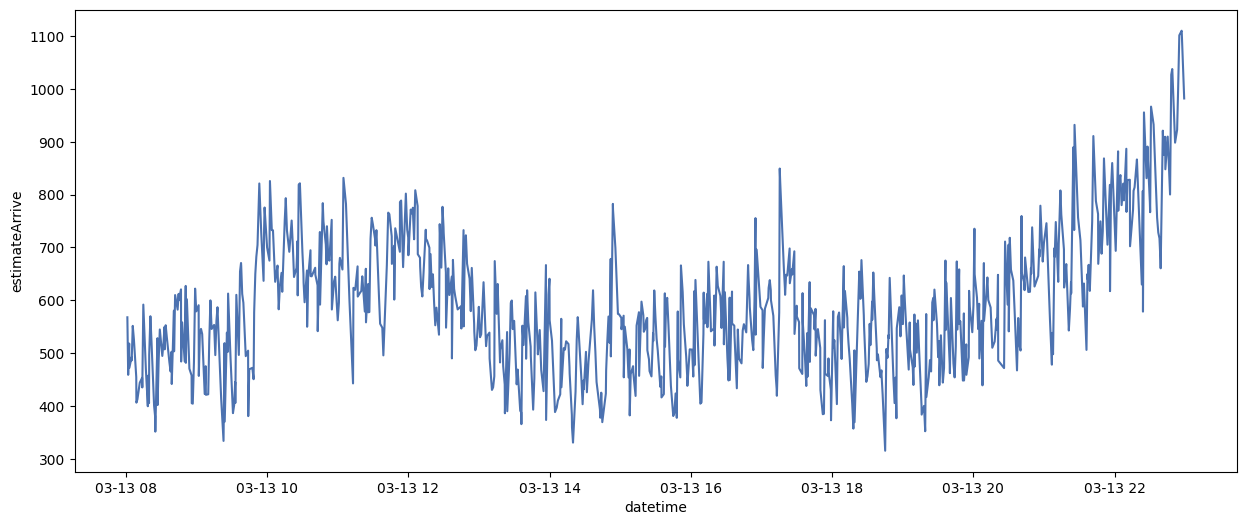

In [35]:
plt.figure(figsize=(15, 6))
sns.lineplot(data=stop_df, x="datetime", y="estimateArrive", ci=None);

## PROFILING 📑

In [36]:
profile = ProfileReport(
    df,
    title="🚌 EMT QA",
    dataset={
        "description": "EMT - Estimaciones del tiempo de llegada del Bus",
        "url": "https://apidocs.emtmadrid.es/#api-Block_3_TRANSPORT_BUSEMTMAD-arrives",
    },
    variables={
        "descriptions": {
            "PK": "Identificador único (Primary Key) del dataset, compuesto por <datetime>_B<bus>_L<linea>_S<parada>",
            "date": "Fecha de la petición a la API",
            "datetime": "Fecha y hora de la petición a la API",
            "line": "Línea de bus",
            "stop": "Parada de bus",
            "bus": "Número identificador del bus",
            "positionBusLon": "Longitud de las coordenadas del bus",
            "positionBusLat": "Latitud de las coordenadas del bus",
            "DistanceBus": "Distancia del bus a la parada (en metros)",
            "destination": "Destino del itinerario",
            "deviation": "Desviación en el cálculo del ETA",
            "StartTime": "Hora de inicio de la línea",
            "StopTime": "Hora de fin de la línea",
            "MinimunFrequency": "Frecuencia mínima de la línea",
            "MaximumFrequency": "Frecuencia máxima de la línea",
            "isHead": "Variable booleana para indicar si la parada es la cabecera de la línea",
            "dayType": " Tipo de día (LA: laboral, FE: festivo, SA: sábado)",
            "strike": "Variable para indicar si ese día hay huelga (S) o no (N)",
            "estimateArrive": "Tiempo estimado de espera del bus (en segundos)",
        }
    },
    interactions=None,
    explorative=True,
    dark_mode=True,
)
profile.to_file(os.path.join(ROOT_PATH, "docs", "qa", "emt_report.html"))
# profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]